# Analysis of Nobel Laurets



### Content
+ Introduction: Nobel prize
+ Data description and objectives
+ Data analysis and visualization 
+ Conclusion

## 1. Introduction: Nobel prize

Awarded for “the greatest benefit to humankind”

Between 1901 and 2019, the Nobel Prizes and the Prize in Economic Sciences were awarded 597 times to 950 people and organisations. The Nobel Prize is an international award administered by the Nobel Foundation in Stockholm, Sweden, and based on the fortune of Alfred Nobel, Swedish inventor and entrepreneur. In 1968, Sveriges Riksbank established The Sveriges Riksbank Prize in Economic Sciences in Memory of Alfred Nobel, founder of the Nobel Prize. Each prize consists of a medal, a personal diploma, and a cash award.

A person or organisation awarded the Nobel Prize is called Nobel Laureate. The word “laureate” refers to being signified by the laurel wreath. In ancient Greece, laurel wreaths were awarded to victors as a sign of honour.



source: https://www.nobelprize.org/prizes/

## 2. Data description and objectives

The Nobel Prize is given to the best minds on our planet.
It is not difficult to assume that the gender ratio of laureates as well as the ratio in different eras of the western and eastern parts of the world are different
And we will consider some aspects and visually analyze in detail the Nobel Prize, taking into account such aspects as gender, age, birth month, age, as well as university

Below is data that we will be used for our analysis:

+ born country code - country where **laureate** was born 
+ died country code -  country where **laureate** died
+ gender - sex of **laureate** 
+ year - when **laureate** get his prize
+ category - category of **laureate** prize
+ share - how many people received for this research besides **laureate**
+ name of university - **laureate**'s university where he/she stady or take some degree
+ country of university - country of university
+ born month - born month
+ age - how old **laureate** are now(2019)or when he died
+ age get prize - age of **laureate** when he get prize





#### 2.1 For analysis, we will consider issues such as:
1. Base Analysis (Country, gender, university)
2. Sex ratio in different areas
3. Prize behavior during World War I and II
4. Analysis of laureates during the Cold War, in particular scientists of the USSR and the USA
5. Analysis of natural factors such as: month of birth, age

Historical eras:

1. World War I (1914-1918) https://en.wikipedia.org/wiki/World_War_I
2. World War II (1939-1945) https://en.wikipedia.org/wiki/World_War_II
3. Cold War (1947-1991) https://en.wikipedia.org/wiki/Cold_War
4. USSR (1922-1991) https://en.wikipedia.org/wiki/Soviet_Union

## 3. Data analysis and visualization 

Berfor analyze read the dataset

In [9]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [10]:
df = pd.read_csv('nobel_final.csv')
df.shape


(923, 14)

In [30]:
df

,firstname,surname,born_country_code,died_country_code,gender,year,category,share,name_of_university,city_of_university,country_of_university,born_month,age,age_get_prize
0,Wilhelm Conrad,Röntgen,DE,DE,male,1901,physics,1,Munich University,Munich,Germany,Mar,78,56
1,Hendrik A.,Lorentz,NL,NL,male,1902,physics,2,Leiden University,Leiden,the Netherlands,Jul,75,49
2,Pieter,Zeeman,NL,NL,male,1902,physics,2,Amsterdam University,Amsterdam,the Netherlands,May,78,37
3,Henri,Becquerel,FR,FR,male,1903,physics,2,École Polytechnique,Paris,France,Dec,56,51
4,Pierre,Curie,FR,FR,male,1903,physics,4,École municipale de physique et de chimie indu...,Paris,France,May,47,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,Peter,Handke,AT,NaN,male,2019,literature,1,NaN,NaN,NaN,Dec,78,77
919,Abiy,Ahmed Ali,ET,NaN,male,2019,peace,1,NaN,NaN,NaN,Aug,44,43
920,Abhijit,Banerjee,IN,NaN,male,2019,economics,3,Massachusetts Institute of Technology (MIT),Cambridge MA,USA,Feb,59,58
921,Esther,Duflo,FR,NaN,female,2019,economics,3,Massachusetts Institute of Technology (MIT),Cambridge MA,USA,Oct,48,47


### 3.1 Base Analysis 


#### 3.1.1 Most Nobel Winner Countries


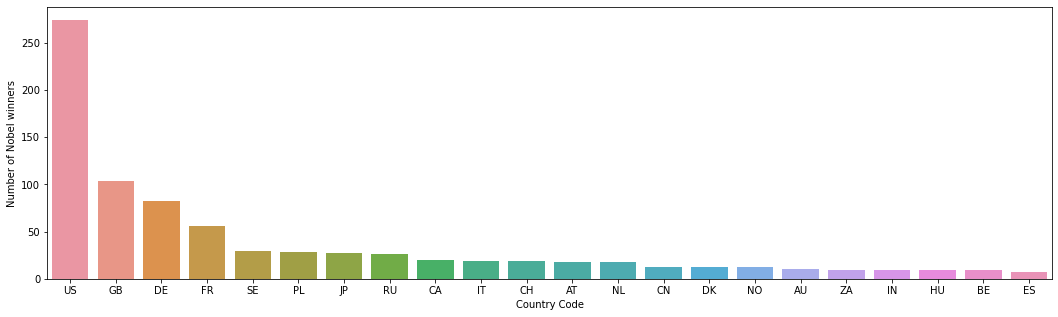

In [23]:
nobel_country = df['born_country_code'].value_counts().to_frame()
nobel_country = nobel_country[nobel_country['born_country_code'] >= 7]
plt.figure(figsize=(18, 5))
sns.barplot(x = nobel_country.index , y = 'born_country_code' ,data = nobel_country)
plt.xlabel('Country Code')
plt.ylabel('Number of Nobel winners')
plt.show()

**USA, Great British, Deutschland(Germany)** and **France** has most winners respectively 

#### 3.1.2 Top Universities with Nobel winers


In [27]:
nobel_university_winner = df['name_of_university'].value_counts().to_frame()
nobel_university_winner = nobel_university_winner[nobel_university_winner['name_of_university'] >= 7]


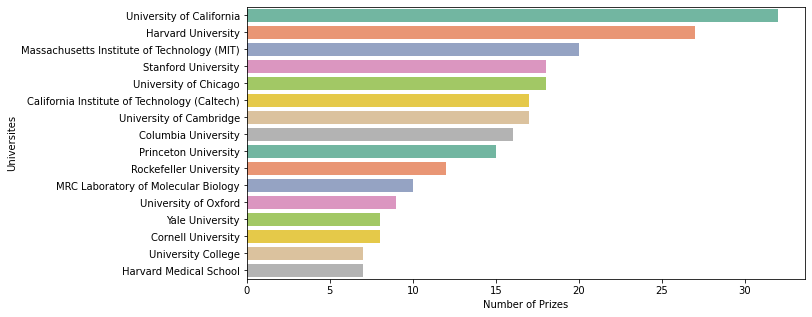

In [29]:
plt.figure(figsize=(10, 5))
sns.barplot(y = nobel_university_winner.index , x = 'name_of_university' ,data = nobel_university_winner ,palette = sns.color_palette('Set2'))
plt.xlabel('Number of Prizes')
plt.ylabel('Universites')
plt.show()

#### 3.1.3 Gender ratio for each sphere

In [30]:
gender_winner = df.groupby('category')['gender'].value_counts().to_frame()
gender_winner.columns = ['number of winners']
gender_winner.reset_index(inplace=True)

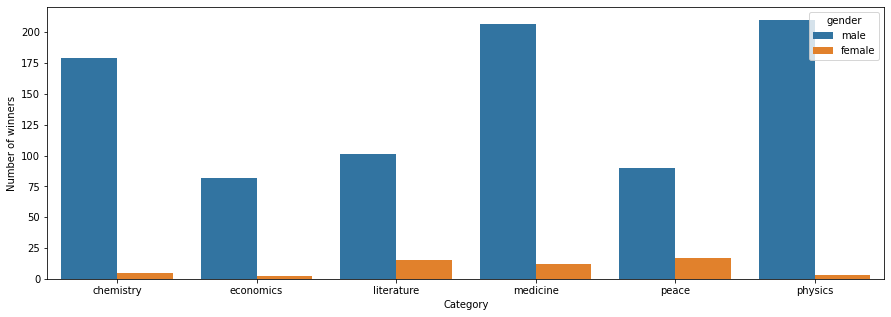

In [33]:
plt.figure(figsize=(15, 5))
sns.barplot(x = 'category' , y = 'number of winners' , hue = 'gender' ,data = gender_winner)
plt.xlabel('Category')
plt.ylabel('Number of winners')
plt.show()

The ratio of men and women is colossal in every area, however in category 'peace' ratio is less 

In [59]:
imigrate_from = {}
imigrate_to = {}

for nobeler in df.iterrows():
    
    born_country = nobeler[1]['born_country_code']
    died_country = nobeler[1]['died_country_code']
    if born_country != died_country and not pd.isna(died_country):
        if born_country in imigrate_from:
            imigrate_from[born_country] += 1
        if born_country not in imigrate_from:
            imigrate_from[born_country] = 1
        if died_country in imigrate_to:
            imigrate_to[died_country] += 1
        else:
            imigrate_to[died_country] = 1
    
    
        
        

            

In [61]:
imigrate_to



{'FR': 16,
 'DE': 18,
 'US': 71,
 'GB': 21,
 'CH': 17,
 'IT': 3,
 'RU': 3,
 'RO': 1,
 'AT': 2,
 'SE': 4,
 'AR': 2,
 'ES': 4,
 'CA': 2,
 'BE': 2,
 'NL': 1,
 'TN': 1,
 'IE': 3,
 'JM': 1,
 'NO': 2,
 'GA': 1,
 'ZA': 1,
 'ZM': 1,
 'IL': 3,
 'IN': 1,
 'PR': 1,
 'RS': 1,
 'GR': 1,
 'AU': 1,
 'PL': 1,
 'MX': 1,
 'BB': 1,
 'SG': 1,
 'PH': 1}